In [1]:
#!pip install stop-words
#!pip install wordcloud
#!pip install Pillow
#pip install quandl
#!pip install plotly
#!pip install psutil

In [2]:
%matplotlib inline
#Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#target search
target_elon = ("@elonmusk")

#counter
counter = 1

#variable for holding sentiments
sentiments = []

#Loop through all tweets
for target in target_elon:
   
    #Variable for oldest tweet
    oldest_tweet = None
    
    #Loop through 5 pages from home feed (total 100 tweets)
    for x in range (20):
        
        #Get all tweets from home feed
        public_tweets = api.user_timeline(target_elon, max_id = oldest_tweet)
        
        #loop through all tweets
        for tweet in public_tweets:
            
            #Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results ["compound"]
            pos = results ["pos"]
            neg = results ["neg"]
            neu = results ["neu"]
            
            #Get oldest tweet id, subtract 1, and assign to oldest tweet
            oldest_tweet = tweet["id"] - 1
            
            #Add sentiments for each tweet into a list
            sentiments.append({"Source":target_elon,
                              "Text":tweet["text"],
                              "Date":tweet["created_at"],
                              "Compound":compound,
                              "Positive":pos,
                              "Neutral":neu,
                              "Negative":neg,
                              "Retweeted?":tweet["retweeted"],
                              "Retweet Count":tweet["retweet_count"],
                              "Favorite Count": tweet["favorite_count"]})
            counter +=1
tweets_df = pd.DataFrame.from_dict(sentiments)
tweets_df.head()
        

,Compound,Date,Favorite Count,Negative,Neutral,Positive,Retweet Count,Retweeted?,Source,Text
0,0.000,Sat Nov 03 17:28:47 +0000 2018,111,0.0,1.000,0.000,4,False,@elonmusk,"@samsheffer Just a few mins, which is mostly a..."
1,0.000,Sat Nov 03 17:05:07 +0000 2018,16516,0.0,1.000,0.000,2777,False,@elonmusk,https://t.co/xGJ4Bc6HpL
2,0.000,Sat Nov 03 07:37:40 +0000 2018,17681,0.0,1.000,0.000,933,False,@elonmusk,So underappreciated
3,0.296,Sat Nov 03 07:36:00 +0000 2018,1426,0.0,0.476,0.524,19,False,@elonmusk,@nichegamer @candiceruizy Ok
4,0.296,Sat Nov 03 07:32:34 +0000 2018,1078,0.0,0.312,0.688,28,False,@elonmusk,@MacTechGenius Ok


In [4]:
#Remove retweets and change the order of columns
tweets_df = tweets_df[tweets_df["Retweeted?"]==False][["Source","Text","Date","Compound","Positive","Neutral","Negative","Retweet Count","Favorite Count"]]
tweets_df.head()

,Source,Text,Date,Compound,Positive,Neutral,Negative,Retweet Count,Favorite Count
0,@elonmusk,"@samsheffer Just a few mins, which is mostly a...",Sat Nov 03 17:28:47 +0000 2018,0.000,0.000,1.000,0.0,4,111
1,@elonmusk,https://t.co/xGJ4Bc6HpL,Sat Nov 03 17:05:07 +0000 2018,0.000,0.000,1.000,0.0,2777,16516
2,@elonmusk,So underappreciated,Sat Nov 03 07:37:40 +0000 2018,0.000,0.000,1.000,0.0,933,17681
3,@elonmusk,@nichegamer @candiceruizy Ok,Sat Nov 03 07:36:00 +0000 2018,0.296,0.524,0.476,0.0,19,1426
4,@elonmusk,@MacTechGenius Ok,Sat Nov 03 07:32:34 +0000 2018,0.296,0.688,0.312,0.0,28,1078


In [5]:
#convert to date format and extract hour
#from datetime import datetime
#from datetime_z import parse_datetime
#date_format = "%Y-%m-%dT%H:%M:%S"
#date_format = "%a%b%m%X%z%Y"
#tweets_df["Date"]= pd.to_datetime(tweets_df["Date"],format = date_format)
#tweets_df["Hour"]= pd.DateTimeIndex(tweets_df[Date]).hour
#date = []
#date = tweets_df["Date"]
#date_format = datetime.strptime(date,"%a-%b-%d-%H:%M:%S+%z-%Y")
#updated_date = date_format.strftime("%Y-%m-%d")
#updated_date
#from datetime import datetime
#from datetime import timezone    
#dates = tweets_df["Date"]
#new_dates = []

#from dateutil import parser
#for date in dates:
    #new_dates = parser.parse(date).strftime("%Y-%m-%d")
    #new_dates.append(date)
#new_dates

#datetime.strptime(tweets_df["Date"], '%a %b %d %H:%M:%S %z %Y').replace(
            #tzinfo=timezone.utc).astimezone(tz=None).strftime('%Y-%m-%d %H:%M:%S'))
    
from datetime import datetime, timezone
import pytz

formatted_date = []

for x in range(0, len(tweets_df)):
    formatted_date.append(datetime.strptime(tweets_df['Date'][x], '%a %b %d %H:%M:%S %z %Y').replace(tzinfo=timezone.utc).astimezone(pytz.timezone('US/Eastern')).strftime(
'%Y-%m-%d'))

tweets_df['formatted_date'] = formatted_date
tweets_df.head()

,Source,Text,Date,Compound,Positive,Neutral,Negative,Retweet Count,Favorite Count,formatted_date
0,@elonmusk,"@samsheffer Just a few mins, which is mostly a...",Sat Nov 03 17:28:47 +0000 2018,0.000,0.000,1.000,0.0,4,111,2018-11-03
1,@elonmusk,https://t.co/xGJ4Bc6HpL,Sat Nov 03 17:05:07 +0000 2018,0.000,0.000,1.000,0.0,2777,16516,2018-11-03
2,@elonmusk,So underappreciated,Sat Nov 03 07:37:40 +0000 2018,0.000,0.000,1.000,0.0,933,17681,2018-11-03
3,@elonmusk,@nichegamer @candiceruizy Ok,Sat Nov 03 07:36:00 +0000 2018,0.296,0.524,0.476,0.0,19,1426,2018-11-03
4,@elonmusk,@MacTechGenius Ok,Sat Nov 03 07:32:34 +0000 2018,0.296,0.688,0.312,0.0,28,1078,2018-11-03


In [6]:
#create new tweets column
tweets_df["Tweets"]= tweets_df["Text"]

#Text Manipulation
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

#function to remove special characters, punctuations, stop words, digits, hyperlinks, etc.
def string_manipulation(df,column):
    #extract hastags
    df["Hashtag"] = df[column].str.findall(r'#.*?(?=\s|$)')
    #extract twitter account references
    df["Accounts"] = df[column].str.findall(r'@.*?(?=\s|$)')
    
    #remove hashtags and accounts from tweets
    df[column] = df[column].str.replace(r'#.*?(?=\s|$)'," ")
    df[column] = df[column].str.replace(r'@.*?(?=\s|$)'," ")
    
    #convert to lower case
    df[column] = df[column].str.lower()
    #remove hyperlinks
    df[column] = df[column].apply(lambda x:re.split('https:\/\/.*',str(x))[0])
    #remove punctuations
    df[column] = df[column].str.replace('[^\w\s]'," ")
    #remove special characters
    df[column] = df[column].str.replace("\W"," ")
    #remove digits
    df[column] = df[column].str.replace("\d+"," ")
    #remove under scores
    df[column] = df[column].str.replace("-"," ")
    #remove stopwords
    df[column] = df[column].apply(lambda x: " ".join([i for i in x.split()
                                                     if i not in (stop_words)]))
    return df

tweets_df = string_manipulation(tweets_df,"Text")
tweets_df.head()

,Source,Text,Date,Compound,Positive,Neutral,Negative,Retweet Count,Favorite Count,formatted_date,Tweets,Hashtag,Accounts
0,@elonmusk,mins mostly accelerating amp decelerating,Sat Nov 03 17:28:47 +0000 2018,0.000,0.000,1.000,0.0,4,111,2018-11-03,"@samsheffer Just a few mins, which is mostly a...",[],[@samsheffer]
1,@elonmusk,,Sat Nov 03 17:05:07 +0000 2018,0.000,0.000,1.000,0.0,2777,16516,2018-11-03,https://t.co/xGJ4Bc6HpL,[],[]
2,@elonmusk,underappreciated,Sat Nov 03 07:37:40 +0000 2018,0.000,0.000,1.000,0.0,933,17681,2018-11-03,So underappreciated,[],[]
3,@elonmusk,ok,Sat Nov 03 07:36:00 +0000 2018,0.296,0.524,0.476,0.0,19,1426,2018-11-03,@nichegamer @candiceruizy Ok,[],"[@nichegamer, @candiceruizy]"
4,@elonmusk,ok,Sat Nov 03 07:32:34 +0000 2018,0.296,0.688,0.312,0.0,28,1078,2018-11-03,@MacTechGenius Ok,[],[@MacTechGenius]


In [7]:
from PIL import Image
from os import path
twitter_mask = np.array(Image.open("images/twitter.png"))
twitter_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
def transform_format(val):
    if val ==0:
        return 255
    else:
        return val

In [9]:
transformed_twitter = np.ndarray((twitter_mask.shape[0],twitter_mask.shape[1]),np.int32)
for i in range(len(twitter_mask)):
    transformed_twitter[i]=list(map(transform_format,twitter_mask[i]))

In [10]:
transformed_twitter

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

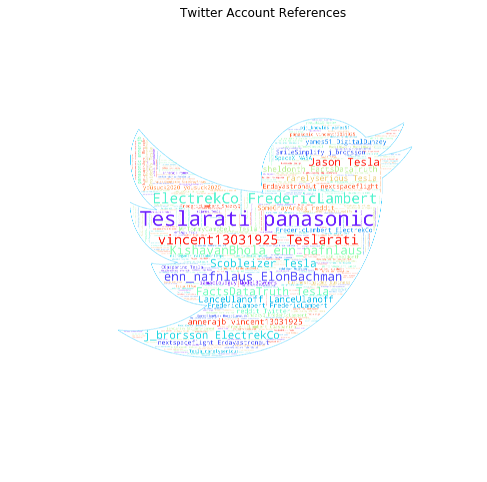

In [11]:
from wordcloud import WordCloud, ImageColorGenerator


acc_wrds = tweets_df["Tweets"].str.extractall(r'(\@\w+)')[0]
def build_word_cloud(words,back_color,palette,title):
    word_cloud = WordCloud(scale = 7, max_words=1000, max_font_size = 100,background_color = "white", random_state = 0, colormap = palette, mask=transformed_twitter,contour_width=10,contour_color="deepskyblue").generate(" ".join(words))
    plt.figure(figsize = (13,8))
    plt.imshow(word_cloud, interpolation = "bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()
    
build_word_cloud(acc_wrds,"black","rainbow","Twitter Account References")

In [12]:
positive_words = pd.read_csv("positive.txt",header=None)
negative_words = pd.read_csv("negative.txt", header=None, encoding='latin-1')

#convert words to lists
def convert_words_list(df):
    words = string_manipulation(df,0)
    words_list = words[words[0] != ""][0].tolist()
    return words_list

positive_words_list = convert_words_list(positive_words)
negative_words_list = convert_words_list(negative_words)

print("Positive Words: ")
print(positive_words_list[:20])
print("Negative Words: ")
print(negative_words_list[:20])

Positive Words: 
['suggestive', 'staple', 'shy', 'overhead', 'momentary', 'piety', 'spur', 'beaver', 'reinforcement', 'toss', 'devour', 'evaluation', 'knockout', 'ajar', 'ingest', 'brazen', 'squishy', 'dry', 'composite', 'customary']
Negative Words: 
['murder', 'leukemia', 'rapist', 'torture', 'torture', 'wreck', 'abuse', 'mourning', 'gonorrhea', 'abuse', 'rape', 'herpes', 'unsanitary', 'murder', 'wreck', 'rape', 'molester', 'disease', 'lynching', 'motherfucker']


In [13]:
renamed_df = tweets_df.rename(columns={"Date": "useless",
                                        "formatted_date": "Date",
                                        "score": "Score"})
renamed_df.head()

,Source,Text,useless,Compound,Positive,Neutral,Negative,Retweet Count,Favorite Count,Date,Tweets,Hashtag,Accounts
0,@elonmusk,mins mostly accelerating amp decelerating,Sat Nov 03 17:28:47 +0000 2018,0.000,0.000,1.000,0.0,4,111,2018-11-03,"@samsheffer Just a few mins, which is mostly a...",[],[@samsheffer]
1,@elonmusk,,Sat Nov 03 17:05:07 +0000 2018,0.000,0.000,1.000,0.0,2777,16516,2018-11-03,https://t.co/xGJ4Bc6HpL,[],[]
2,@elonmusk,underappreciated,Sat Nov 03 07:37:40 +0000 2018,0.000,0.000,1.000,0.0,933,17681,2018-11-03,So underappreciated,[],[]
3,@elonmusk,ok,Sat Nov 03 07:36:00 +0000 2018,0.296,0.524,0.476,0.0,19,1426,2018-11-03,@nichegamer @candiceruizy Ok,[],"[@nichegamer, @candiceruizy]"
4,@elonmusk,ok,Sat Nov 03 07:32:34 +0000 2018,0.296,0.688,0.312,0.0,28,1078,2018-11-03,@MacTechGenius Ok,[],[@MacTechGenius]


In [14]:
#Scoring tweets based on positive and negative words count
def scoring_tweets(data_frame,text_column):
    data_frame["positive"] = data_frame[text_column].apply(lambda x:" ".join([i for i in x.split() 
                                                                              if i in (positive_words_list)]))
    data_frame["negative"] = data_frame[text_column].apply(lambda x:" ".join([i for i in x.split()
                                                                              if i in (negative_words_list)]))
    #scoring
    data_frame["positive_count"] = data_frame["positive"].str.split().str.len()
    data_frame["negative_count"] = data_frame["negative"].str.split().str.len()
    data_frame["score"]    = data_frame["positive_count"] - data_frame["negative_count"]
    
    #create new feature sentiment :
    #+ve if score is +ve , #-ve if score is -ve , # neutral if score is 0
    def labeling(data_frame) :
        if data_frame["score"]   > 0  :
            return "positive"
        elif data_frame["score"] < 0  :
            return "negative"
        elif data_frame["score"] == 0 :
            return "neutral"
    data_frame["sentiment"] = data_frame.apply(lambda data_frame:labeling(data_frame),
                                               axis = 1)
        
    return data_frame

#print(scoring_tweets)
scoring_tweets_df  =  scoring_tweets(renamed_df,"Text")
scoring_tweets_df[["Text","positive","negative", "Date","positive_count",
              "negative_count","score","sentiment"]]


,Text,positive,negative,Date,positive_count,negative_count,score,sentiment
0,mins mostly accelerating amp decelerating,amp,,2018-11-03,1,0,1,positive
1,,,,2018-11-03,0,0,0,neutral
2,underappreciated,,,2018-11-03,0,0,0,neutral
3,ok,ok,,2018-11-03,1,0,1,positive
4,ok,ok,,2018-11-03,1,0,1,positive
5,walked full length boring co tunnel la tonight...,full length disturbingly track opening dec one...,boring long dimensional,2018-11-03,8,3,5,positive
6,sounds like pure luxury said sponge actually s...,like pure luxury sponge actually speaking meta...,,2018-11-03,8,0,8,positive
7,love,love,,2018-11-03,1,0,1,positive
8,bikini bottom,bottom,bottom,2018-11-03,1,1,0,neutral
9,fair,fair,,2018-11-03,1,0,1,positive


In [19]:
scr_dist = renamed_df["score"].value_counts().reset_index().sort_values(by = "index",
                                                                          ascending = True)
trace = go.Bar(x = scr_dist[scr_dist["index"] < 0]["index"],
               y = scr_dist[scr_dist["index"] < 0]["score"],
               marker = dict(line = dict(width = 1,color = "black"),
                             color = "red"),name = "Negative"
              )
trace1 = go.Bar(x = scr_dist[scr_dist["index"] > 0]["index"],
                y = scr_dist[scr_dist["index"] > 0]["score"],
                marker = dict(line = dict(width = 1,color = "black"),
                              color = "green"),name = "Positive"
              )
trace2 = go.Bar(x = scr_dist[scr_dist["index"] == 0]["index"],
                y = scr_dist[scr_dist["index"] == 0]["score"],
                marker = dict(line = dict(width = 1,color = "black"),
                              color = "blue"),name = "Zero"
              )
layout = go.Layout(dict(title = "Scores distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        )
                  )
fig = go.Figure(data = [trace,trace1,trace2],layout = layout)
py.iplot(fig)
plt.savefig('images\scores_dist')

<Figure size 432x288 with 0 Axes>

In [ ]:
tweets_df.head()

In [ ]:
average_tweets_df = scoring_tweets_df.groupby(['Date']).mean()
average_tweets_df = average_tweets_df[['score']]
average_tweets_df.head()

In [ ]:
tsla_csv = "DATA/TSLA2.csv"
tsla_df = pd.read_csv(tsla_csv)

goog_csv = "DATA/GOOG2.csv"
goog_df = pd.read_csv(goog_csv)

pypl_csv = "DATA/PYPL2.csv"
pypl_df = pd.read_csv(pypl_csv)
pypl_df.head()

In [ ]:
stock_df = pd.merge(tsla_df, goog_df, on="Date")
stock_df.head()

In [ ]:
stocks_df = pd.merge(stock_df, pypl_df, on="Date")
stocks_df.head()

In [ ]:
machine_df = pd.merge(stocks_df, average_tweets_df, on="Date")
machine_df

In [ ]:
outcome = machine_df["score"]

In [ ]:
data = machine_df.drop("score", axis=1)
updated_data = data.drop("Date", axis =1)
updated_data

In [ ]:
X = updated_data
y = outcome

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=min(y), xmax=max(y))
plt.title("Residual Plot")